In [1]:
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install numpy

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X,y=mnist.data, mnist.target

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

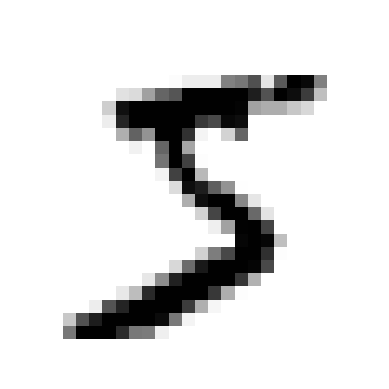

In [8]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit=X[0]
plot_digit(some_digit)
plt.show()

In [9]:
y[0]

'5'

In [10]:
X_train, X_test, y_train, y_test=X[:60000],X[60001:],y[:60000], y[60000:]

In [11]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [14]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [17]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.90965, 0.90965, 0.90965])

In [18]:
#more controllable cross val function
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf=clone(sgd_clf)
  X_train_folds=X_train[train_index]
  y_train_folds=y_train_5[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred=clone_clf.predict(X_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [21]:
from sklearn.metrics import precision_score , recall_score, f1_score
print(precision_score(y_train_5, y_train_pred))

print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [22]:
f1_score(y_train_5, y_train_pred)


0.7325171197343846

In [23]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [24]:
threshold=0
y_some_digit_pred=(y_scores>threshold)


In [25]:
#the classifier uses the threshold as 0, we change it
threshold=3000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [26]:
y_scores= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds=precision_recall_curve(y_train_5, y_scores)

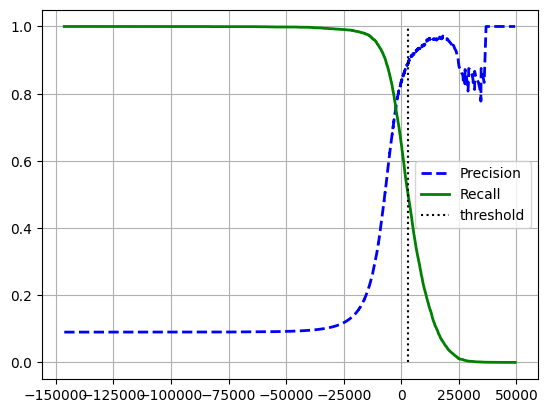

In [28]:
import numpy as np
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

intersections_precision = np.abs(thresholds - threshold) < 0.01  # Adjust tolerance as needed
intersections_recall = np.abs(thresholds - threshold) < 0.01

plt.grid(True)
plt.legend()
plt.show()

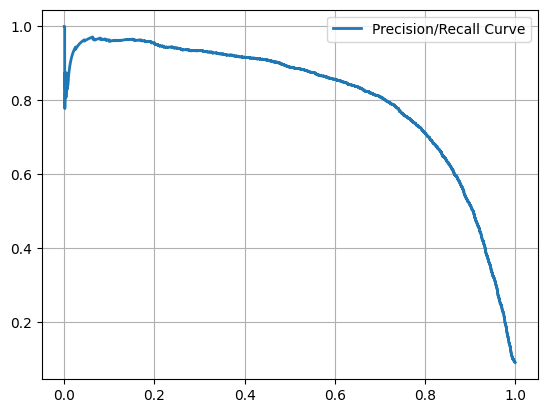

In [29]:
#plotting precision direclty against recall
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")

plt.legend()
plt.grid(True)
plt.show()

In [30]:
#to get the lowest threshold that returns the preciison of 90%
idx_for_90_precision=(precisions>=0.90).argmax()
threshold_for_90_precision=thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [31]:
y_train_pred_90=(y_scores>=threshold_for_90_precision)

In [32]:
precision_score(y_train_5, y_train_pred_90)


0.9000345901072293

In [33]:
recall_at_90_precision=recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y_train_5, y_scores)

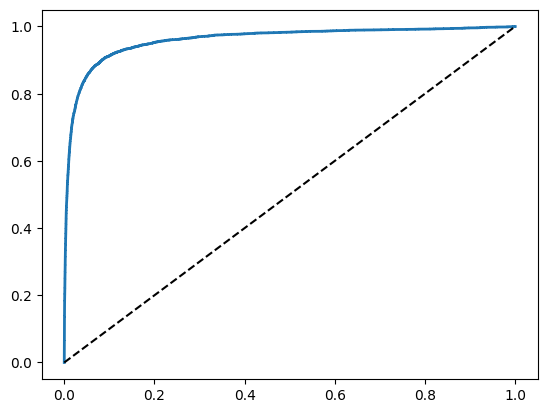

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr, tpr)
plt.show()


In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


0.9604938554008616

In [37]:
#comparing rfc to sgdc based on roc, auc curve
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [38]:
y_scores_forest=y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5, y_scores_forest)

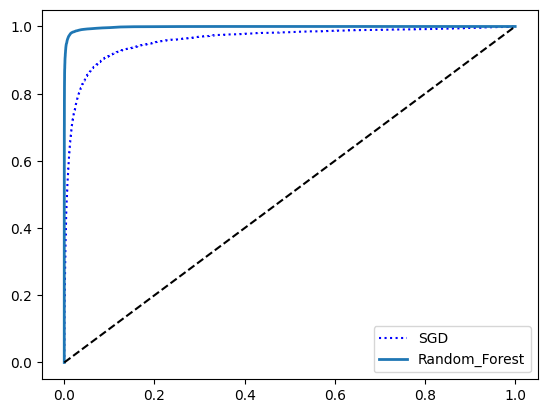

In [39]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random_Forest")
plt.legend(loc="lower right")
plt.show()

In [40]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [41]:
threshold=0.5
y_pred_forest=(y_scores_forest>=threshold).astype(int)

print("Precision:",precision_score(y_train_5, y_pred_forest))

print("Recall:", recall_score(y_train_5, y_pred_forest))

Precision: 0.9897468089558485
Recall: 0.8725327430363402


In [44]:
from sklearn.svm import SVC
svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [45]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [47]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [49]:
class_id=some_digit_scores.argmax()
class_id

5

In [51]:
svm_clf.classes_
svm_clf.classes_[class_id]

'5'

In [52]:
#mc classifier OvR on svc
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [54]:
ovr_clf.predict([some_digit])
len(ovr_clf.estimators_)

10

In [ ]:
#sgdf on mc ds
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit]).round()


In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy ")